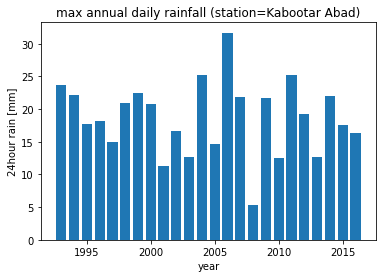

norm mean= 18.662500206395467 , scale= 6.141986423112641
lognorm mean= 1.6313784444751678 , scale= 16.099321278323142
gamma mean= 38.00382219733807 , scale= -19.269090108480636
beta a= 4.451853402971489 , b= 4.3496897354321105 , scale= 36.91632051527253


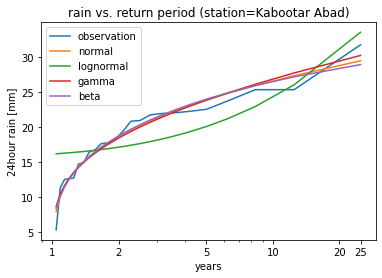

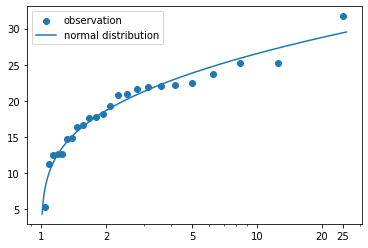

,year,24h rain [mm]
0,2.0,18.7
1,5.0,23.8
2,10.0,26.5
3,20.0,28.8
4,25.0,29.4


In [142]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, gamma, beta
from scipy.optimize import minimize
import pandas as pd

rain_data=np.array([[1993,23.7],[1994,22.2],[1995,17.7],[1996,18.2],[1997,14.900001]
, [1998,20.9],[1999,22.5],[2000,20.800001],[2001,11.3],[2002,16.7]
, [2003,12.6],[2004,25.300001],[2005,14.7],[2006,31.7],[2007,21.9]
, [2008,5.3],[2009,21.7],[2010,12.5],[2011,25.300001],[2012,19.300001]
, [2013,12.7],[2014,22],[2015,17.6],[2016,16.4]])

year=rain_data[:,0]
rain=rain_data[:,1]

plt.figure()
plt.bar(year,rain)
plt.xlabel('year')
plt.ylabel('24hour rain [mm]')
plt.title('max annual daily rainfall (station=Kabootar Abad)')
plt.show()

rain=-np.sort(-rain)

N=len(rain)
recurrence_interval=(N+1)/(np.arange(N)+1)
P_exceedance=1/recurrence_interval

mean_=18.66248709
scale_=6.141986833
b_norm=[mean_,scale_]
def func_norm(b_norm,rain,P_exceedance):
    rain_norm=norm.ppf(1-P_exceedance,b_norm[0],b_norm[1])
    return np.mean(np.square(rain-rain_norm))
b_norm=minimize(func_norm,b_norm,args=(rain,P_exceedance)).x
print('norm mean=',b_norm[0],', scale=',b_norm[1])
rain_norm=norm.ppf(1-P_exceedance,b_norm[0],b_norm[1])


mean_=2.890363926
scale_=0.313309479
b_lognorm=[mean_,scale_]
def func_lognorm(b_lognorm,rain,P_exceedance):
    rain_norm=lognorm.ppf(1-P_exceedance,b_lognorm[0],b_lognorm[1])
    return np.mean(np.square(rain-rain_norm))
b_lognorm=minimize(func_lognorm,b_lognorm,args=(rain,P_exceedance)).x
print('lognorm mean=',b_lognorm[0],', scale=',b_lognorm[1])
rain_lognorm=lognorm.ppf(1-P_exceedance,b_lognorm[0],b_lognorm[1])


mean_=20
scale_=0.2
b_gamma=[mean_,scale_]
def func_gamma(b_gamma,rain,P_exceedance):
    rain_norm=gamma.ppf(1-P_exceedance,b_gamma[0],b_gamma[1])
    return np.mean(np.square(rain-rain_norm))
b_gamma=minimize(func_gamma,b_gamma,args=(rain,P_exceedance)).x
print('gamma mean=',b_gamma[0],', scale=',b_gamma[1])
rain_gamma=gamma.ppf(1-P_exceedance,b_gamma[0],b_gamma[1])


scale_=25
a_=4
b_=6
b_beta=[a_,b_,scale_]
def func_beta(b_beta,rain,P_exceedance):
    rain_norm=b_beta[2]*beta.ppf(1-P_exceedance,b_beta[0],b_beta[1])
    return np.mean(np.square(rain-rain_norm))
b_beta=minimize(func_beta,b_beta,args=(rain,P_exceedance)).x
print('beta a=',b_beta[0],', b=',b_beta[1],', scale=',b_beta[2])
rain_beta=b_beta[2]*beta.ppf(1-P_exceedance,b_beta[0],b_beta[1])


plt.figure()
plt.plot(recurrence_interval,rain,label='observation')
plt.plot(recurrence_interval,rain_norm,label='normal')
plt.plot(recurrence_interval,rain_lognorm,label='lognormal')
plt.plot(recurrence_interval,rain_gamma,label='gamma')
plt.plot(recurrence_interval,rain_beta,label='beta')
plt.title('rain vs. return period (station=Kabootar Abad)')
plt.xlabel('years')
plt.ylabel('24hour rain [mm]')
plt.xscale('log')
ticks = [1, 2, 5, 10, 20, 25]
plt.xticks(ticks, [x for x in ticks ])
plt.legend()
plt.show()


year_=np.arange(1,26,0.01)
P_exceed=1/year_
rain_new=norm.ppf(1-P_exceed,b_norm[0],b_norm[1])


plt.figure()
plt.scatter(recurrence_interval,rain,label='observation')
plt.plot(year_,rain_new,label='normal distribution')
plt.xscale('log')
ticks = [1, 2, 5, 10, 20, 25]
plt.xticks(ticks, [x for x in ticks ])
plt.legend()
plt.show()

year_=np.array([2,5,10,20,25])
P_exceed=1/year_
rain_new=np.round(norm.ppf(1-P_exceed,b_norm[0],b_norm[1]),1)

display(pd.DataFrame(np.c_[year_,rain_new],columns=['year','24h rain [mm]']))
